# 디지털 신호처리 중간고사 대체과제
## 컴퓨터과학과/201910976/안선정

In [200]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


%matplotlib inline

## 1. perfect_pitch.wav를 read하고 소리를 들어보세요.

In [1]:
from thinkdsp import read_wave
wave = read_wave('perfect_pitch.wav') 
wave.normalize()
wave.make_audio()

## 2. perfect_pitch.wav의 framerate은?

In [201]:
wave.framerate

48000

framerate은 48000이다. 

## 3.perfect_pitch.wav에서는 몇개의 음계가 포함되어 있는가?

다음은 시간이 지남에 따라 주파수를 관찰하기 위해 spectrogram을 출력한 것이다. 

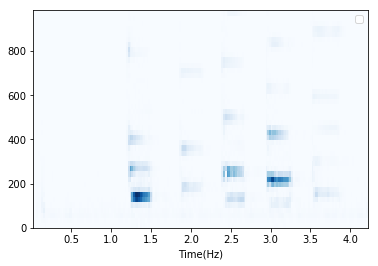

In [4]:
spectro = wave.make_spectrogram(seg_length= 2048)
spectro.plot(1000)
thinkplot.config(xlabel = "Time(Hz)")

시간이 지남에 따라 1.2~1.5, 1.8~2.2, 2.4~2.7, 2.9~3.3, 3.5~3.9구간, 즉 5번의 구간에 음이 찍히는 것을 알 수 있고, harmonics가 위로 층층이 있는 것을 관찰 할 수 있다. 

즉 5개의 음계가 관찰 되는 것을 알 수 있었다.


## 4. spectrum 분석을 이용하여  perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

다음은 wave specturm을 출력한 것이다. 

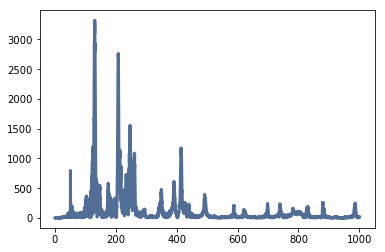

In [203]:
wave.make_spectrum().plot(1000)

spectrogram에서 관찰한 것과 같이 구간마다 segment하여 관찰할 것이다. 

#### 1.2~1.5구간에서의 spectrum

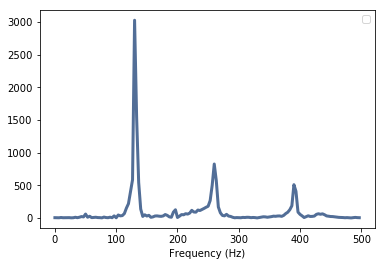

In [204]:
segment = wave.segment(start = 1.2, duration = 0.3)
segment.make_spectrum().plot(500)
thinkplot.config(xlabel = "Frequency (Hz)")

1.2~1.5에서의 음계는 130Hz(C3)정도의 음계가 주로 이루고 있다. 

#### 1.8~2.3구간에서의 spectrum

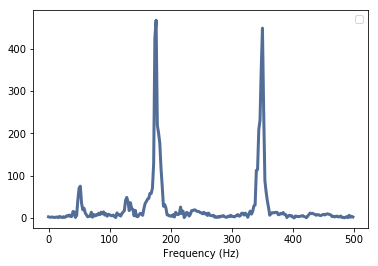

In [206]:
segment = wave.segment(start = 1.8, duration = 0.5)

segment.make_spectrum().plot(500)
thinkplot.config(xlabel = "Frequency (Hz)")

1.8~2.3에서의 음계는 180Hz(F3~F#3), 350Hz(F4~F#4)정도의 음계가 주로 이루고 있다.

#### 2.4~2.7구간에서의 spectrum

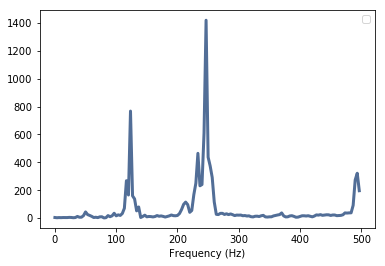

In [207]:
segment = wave.segment(start = 2.4, duration = 0.3)
segment.make_spectrum().plot(500)
thinkplot.config(xlabel = "Frequency (Hz)")

2.4~2.7에서의 음계는 120Hz(A#2~B2), 230Hz(A#3)정도의 음계가 주로 이루고 있다. 
#### 2.9~3.4구간에서의 spectrum

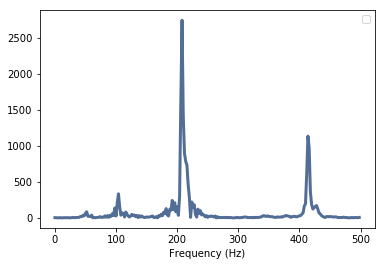

In [208]:
segment = wave.segment(start = 2.9, duration = 0.5)
segment.make_spectrum().plot(500)
thinkplot.config(xlabel = "Frequency (Hz)")

2.9~3.4에서의 음계는 210Hz(G#3), 420Hz(G#4)정도의 음계가 주로 이루어져 있다. 

#### 3.5~3.9구간에서의 spectrum

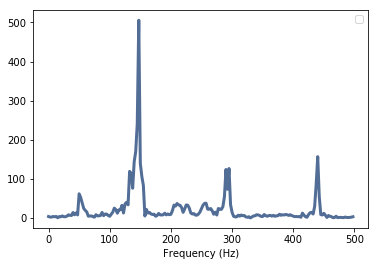

In [209]:
segment = wave.segment(start = 3.5, duration = 0.4)
segment.make_spectrum().plot(500)
thinkplot.config(xlabel = "Frequency (Hz)")

3.5~3.9에서의 음계는 140Hz(C#3~D3)를 주로 이루어져 있으며, 280Hz(C#4~D4), 420Hz(G#4)정도의 음계도 관찰된다. 

## 5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

In [12]:
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave,lag)for lag in lags]
    return lags, corrs

In [13]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0,1]
    return corr

각 구간 [1.2~1.5, 1.8~2.2, 2.4~2.7, 2.9~3.3, 3.5~3.9]을 나누어 계산한다.

### autocorrelation을 하기 위해 peak가 되는 lag값을 구한다.

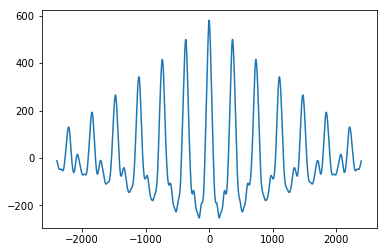

In [210]:
segment = wave.segment(start = 1.2, duration = 0.1)
N = len(segment)
corrs2 = np.correlate(segment.ys, segment.ys, mode = 'same')
lags = np.arange(-N//2, N//2)
plt.plot(lags, corrs2)

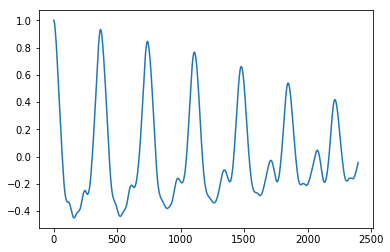

In [158]:
N = len(corrs2)
lengths = range(N,N//2, -1)
half = corrs2[N//2:].copy()
half /= lengths
half /= half[0]
plt.plot(half)

lag가 200~400정도에서 peak가 있음을 알 수 있다. 

In [184]:
low, high =200,400
lag = np.array(corrs2[low:high]).argmax() + low
lag

200

200이 주기인 것을 알 수 있다. 

estimate_fundamental 함수 parameter 값을 low = 200, high =400으로 주었다. 

In [185]:
def estimate_fundamental(segment, low=200, high=400):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

### 구간마다 나누어 음계를 알아낸다.

#### 1.2~1.5구간에서 음을 찾아 출력하였다. 

In [194]:
ts = []
freqs = []
duration = 0.3
segment = wave.segment(start=1.2, duration=duration)
freq = estimate_fundamental(segment)
ts.append(1.35)
freqs.append(freq)
freq

130.43478260869566

130Hz(C3)가 검출되었다.

#### 1.8~2.3구간에서 음을 찾아 출력하였다.

In [195]:
duration = 0.4
segment = wave.segment(start=1.8, duration=duration)
freq = estimate_fundamental(segment)
ts.append(2.0)
freqs.append(freq)
freq

174.54545454545456

174Hz(F3)이 검출되었다. 

#### 2.4~2.7구간에서 음을 찾아 출력하였다.

In [196]:
duration = 0.3
segment = wave.segment(start=2.4, duration=duration)
freq = estimate_fundamental(segment)
ts.append(2.55)
freqs.append(freq)
freq

123.07692307692307

123Hz(B2)가 검출되었다. 

#### 2.9~3.4구간에서 음을 찾아 출력하였다. 

In [197]:
duration = 0.5
segment = wave.segment(start=2.9, duration=duration)
freq = estimate_fundamental(segment)
ts.append(2.9+0.25)
freqs.append(freq)
freq

207.79220779220779

207Hz(G#3)가 검출되었다.

#### 3.5~3.9구간에서 음을 찾아 출력하였다. 

In [198]:
duration = 0.4
segment = wave.segment(start=3.5, duration=duration)
freq = estimate_fundamental(segment)
ts.append(3.7)
freqs.append(freq)
freq

146.78899082568807

146Hz(D3)이 검출되었다.

### spectrogram과 구간마다 검출된 음을 나타낸 것이다. 
이때 5개의 구간에 대한 음계를 잘 볼 수 있도록, 구간마다 음을 찾을때 freqs, ts에 각각 측정time과 freq를 넣어주었다. 

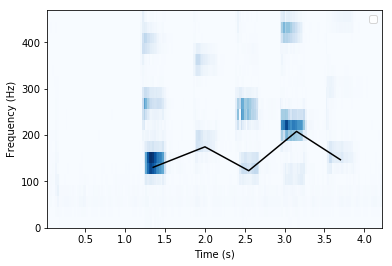

In [199]:
wave.make_spectrogram(2048).plot(high=500)
plt.plot(ts, freqs, color='black')
thinkplot.config(xlabel='Time (s)', 
                     ylabel='Frequency (Hz)')

### 6. perfect_pitch를 분석해보고 디지털신호처리 관점에서 느낀점은?

1. perfect_pitch를 먼저 make_audio()를 하고 나서 들어봤을 때, 어떤 식으로 음이 진행하는지 짐작할 수 있었다. 직접 spectrogram과 spectrum 분석을 해보니 생각한 것과는 다르게, 생각한 음의 주파수가 spectrum과 spectrogram에 표시는 되어 있지만, 다른 음의 주파수가 더 커서 검출이 되지 않은 부분도 있었다. 이 경험을 통해 소리가 한 음으로 들린다고 해도 여러 음계들이 있을 수 있다는 것을 깨달았다.


2. 이 과제를 하기 전에는 음계를 찾는 방법 하면 spectrum을 사용한 분석방법이 주로 생각났었다. 실제로 autocorrelation이라는 방법을 이용해 음계를 찾아보고, spectrogram을 이용해서 비교를 해보니, spectrum만을 가지고 분석해서 끝나는 것보다는 여러 방법과 같이 적용해보면서 맞는지 틀린 지 다시 확인해보는 과정도 필요할 것 같다고 느꼈다. 


3. 과제를 하면서 효율적으로 주파수를 알아내는 방식을 차마 생각해내지 못하였다. 그래서 음 하나하나 출력을 위해 wave를 구간마다 segment 해서 출력하는 방식으로 진행하였는데, 더 효율적인 방법을 알고 싶다. 

